<a href="https://colab.research.google.com/github/CheayeonLee/ESAA_OB/blob/main/10%EC%A3%BC%EC%B0%A8%EA%B3%BC%EC%A0%9C(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 09. 추천 시스템

## 01. 추천 시스템의 개요와 배경

### 추천 시스템의 개요
- 사용자 자신도 좋아하는지 몰랐던 취향을 시스템이 발견하고 그에 맞는 콘텐츠를 추천해줌
- 더 많은 데이터가 추천 시스템에 축적되면서 추천이 더욱 정확해지고 다양한 결과를 얻을 수 있는 선순환 시스템을 구출할 수 있음

### 온라인 스토어의 필수 요소, 추천 시스템
- 많은 양의 고객과 상품 관련 데이터를 가지고 있는데 이 모든 데이터가 사용자가 흥미를 가질 만한 상품을 즉각적으로 추천하는 데 사용됨

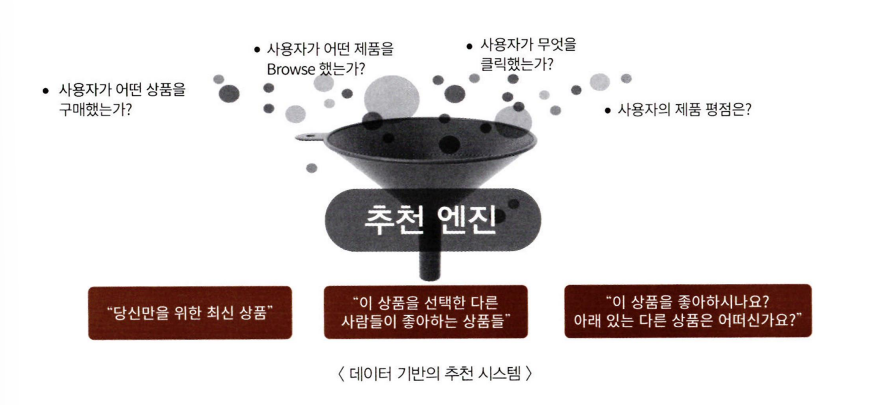

### 추천 시스템의 유형
- 콘텐츠 기반 필터링
- 협업 필터링
> - 최근접 이웃 협업 필터링
> - 잠재 요인 협업 필터링

ex) 넷플릭스 추천 시스템 경연 대회에서 행렬 분해 기법을 이용한 잠재 요인 협업 필터링 방식이 우승하면서 이를 많이 적용

- 요즘은 개인화 특성을 좀 더 강화하기 위해 하이브리드 형식으로 콘텐츠 기반과 협업 기반을 적절히 결합해 사용하는 경우도 늘고 있음

## 02. 콘텐츠 기반 필터링 추천 시스템

- 사용자가 특정한 아이템을 매우 선호하는 경우, 그 아이템과 비슷한 콘텐츠를 가진 다른 아이템을 추천하는 방식


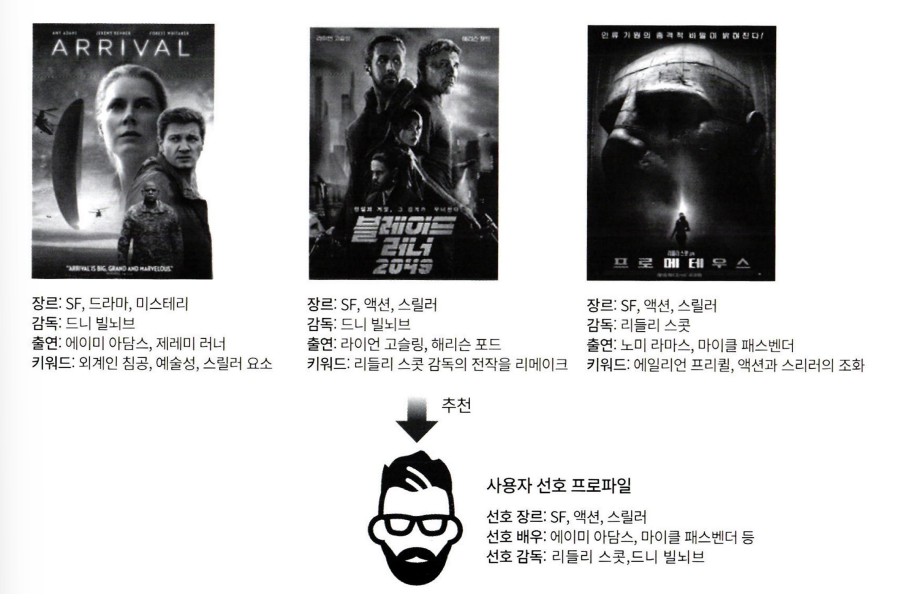

## 03. 최근접 이웃 협업 필터링

- 친구들에게 물어보는 것과 유사한 방식으로, 사용자가 아이템에 매긴 평점 정보나 상품 구매 이력과 같은 사용자 행동 양식만을 기반으로 추천을 수행하는 것
- 목표: 사용자-아이템 평점 매트릭스와 같은 축적된 사용자 행동 데이터를 기반으로 사용자가 아직 평가하지 않은 아이템을 예측 평가하는 것

2개 방식으로 나뉨
- 모두 사용자-아이템 평점 행렬 데이터에만 의지해 추천을 수행

1. 최근접 이웃 방식
2. 잠재 요인 방식

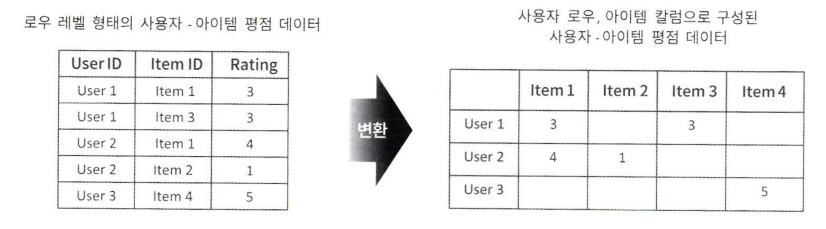

- 많은 아이템을 열로 가지는 다차원 행렬
- 사용자가 아이템에 대한 평점을 매기는 경우가 많지 않기 때문에 희소 행렬 특성을 가지고 있음

1. 최근접 이웃 협업 필터링
> 1. 사용자 기반: 당신과 비슷한 고객들이 다음 상품도 구매했습니다.
> 2. 아이템 기반: 이 상품을 선택한 다른 고객들은 다음 상품도 구매했습니다.
- 다른 사용자를 TOP-N으로 선쟁해 이 TOP-N 사용자가 좋아하는 아이템을 추천하는 방식

2. 아이템 기반 최근접 이웃 방식
- 아이템이 가지는 속성과 상관없이 사용자들이 그 아이템을 좋아하는지/싫어하는지의 평가 척도가 유사한 아이템을 추천하는 기준이 되는 알고리즘

유사도 측정 방법
- 코사인 유사도

## 04. 잠재 요인 협업 필터링

### 잠재 요인 협업 필터링의 이해

- 사용자-아이템 평점 매트릭스 속에 숨어 있는 잠재 요인을 추출해 추천 예측을 할 수 있게 하는 기법
- 대규모 다차원 행렬을 SVD와 같은 차원 감소 기법으로 분해하는 과정에서 잠재 요인을 추출(행렬 분해)
- 잠재 요인: ex. 영화 평점 기반의 사용자-아이템 평점 행렬 데이터라면 영화가 가지는 장르별 특성 선호도로 가정할 수 있음

### 행렬 분해의 이해
- 다차원의 매트릭스를 저차원 매트릭스로 분해하는 기법
- 대표: SVD(널 값이 없는 경우에만)
- 널 값이 있는 경우: 확률적 경사 하강법 사용

### 확률적 경사 하강법을 이용한 행렬 분해
- P와 Q 행렬로 계산된 예측 R 행렬 값이 실제 R 행렬 값과 가장 최소의 오류를 가질 수 있도록 반복적인 비용 함수 최적화를 통해 P와 Q를 유추해내는 것

절차
1. P와 Q를 임의의 값을 가진 행렬로 설정합니다.
2. P와 Q.T 값을 곱해 예측 R 행렬을 계산하고 예측 R 행렬과 실제 R 행렬에 해당하는 오류 값을 계산합니다.
3. 이 오류 값을 최소화할 수 있도록 P와 Q 행렬을 적절한 값으로 각각 업데이트 합니다.
4. 만족할 만한 오류 값을 가질 때까지 2,3번 작업을 반복하면서 P와 Q 값을 업데이트해 근사화합니다.

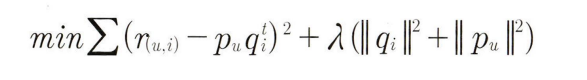

In [1]:
import numpy as np

In [2]:
# 원본 행렬 R 생성, 분해 행렬 P와 Q 초기화, 잠재 요인 차원 K는 3으로 설정.
R = np.array([[4, np.NaN, np.NaN, 2, np.NaN],
              [np.NaN, 5, np.NaN, 3, 1],
              [np.NaN,np.NaN,3,4,4],
              [5,2,1,2,np.NaN]])
num_users, num_items = R.shape
K = 3

# P와 Q 행렬의 크기를 지정하고 정규 분포를 가진 임의의 값으로 입력합니다.
np.random.seed(1)
P = np.random.normal(scale=1./K, size = (num_users,K))
Q = np.random.normal(scale=1./K, size = (num_items,K))

In [3]:
# 실제 R 행렬과 예측 행렬의 오차를 구하는 get_rmse() 함수
from sklearn.metrics import mean_squared_error

def get_rmse(R, P, Q, non_zeros):
  error=0
  # 두 개의 분해된 행렬 P와 Q.T의 내적으로 예측 R 행렬 생성
  full_pred_matrix = np.dot(P, Q.T)

  # 실제 R 행렬에서 널이 아닌 값의 위치 인덱스 추출해 실제 R 행렬과 예측 행렬의 RMSE 추출
  x_non_zero_ind = [non_zero[0] for non_zero in non_zeros]
  y_non_zero_ind = [non_zero[1] for non_zero in non_zeros]
  R_non_zeros = R[x_non_zero_ind, y_non_zero_ind]
  full_pred_matrix_non_zeros = full_pred_matrix[x_non_zero_ind, y_non_zero_ind]
  mse = mean_squared_error(R_non_zeros, full_pred_matrix_non_zeros)
  rmse = np.sqrt(mse)

  return rmse

In [6]:
# SGD 기반으로 행렬 분해를 수행
# R>0인 행 위치, 열 위치, 값을 non_zeros 리스트에 저장.
non_zeros = [(i, j, R[i,j]) for i in range(num_users) for j in range(num_items) if R[i,j]>0]

steps=1000
learning_rate=0.01
r_lambda=0.01

# SGD 기법으로 P와 Q 매트릭스를 계속 업데이트.
for step in range(steps):
  for i,j,r in non_zeros:
    # 실제 값과 예측 값의 차이인 오류 값 근황
    eij = r - np.dot(P[i,:], Q[j,:].T)
    # Regularization을 반영한 SGD 업데이트 공식 적용
    P[i,:] = P[i,:] + learning_rate*(eij * Q[j,:] - r_lambda*P[i,:])
    Q[j,:] = Q[j,:] + learning_rate*(eij * P[i,:] - r_lambda*Q[j,:])
    rmse = get_rmse(R, P, Q, non_zeros)
    if (step%50)==0:
      print("### iteration step : ", step, " rmse : ", rmse)

### iteration step :  0  rmse :  3.258373037576403
### iteration step :  0  rmse :  3.2575197817145116
### iteration step :  0  rmse :  3.2501912057618334
### iteration step :  0  rmse :  3.247987118111602
### iteration step :  0  rmse :  3.248149745068355
### iteration step :  0  rmse :  3.2468864567400373
### iteration step :  0  rmse :  3.2451632179291336
### iteration step :  0  rmse :  3.243376492763619
### iteration step :  0  rmse :  3.2377577105736512
### iteration step :  0  rmse :  3.235691847102866
### iteration step :  0  rmse :  3.2358144426864195
### iteration step :  0  rmse :  3.2343064984958967
### iteration step :  50  rmse :  0.5012067337091821
### iteration step :  50  rmse :  0.5010845338125174
### iteration step :  50  rmse :  0.5001275913891531
### iteration step :  50  rmse :  0.5000049988365678
### iteration step :  50  rmse :  0.5001027583689907
### iteration step :  50  rmse :  0.4994850370026966
### iteration step :  50  rmse :  0.4995861937800344
### iterat

In [7]:
pred_matrix = np.dot(P, Q.T)
print('예측 행렬:\n', np.round(pred_matrix, 3))

예측 행렬:
 [[3.991 0.744 1.351 2.002 1.739]
 [6.58  4.978 0.947 2.981 1.003]
 [6.815 0.42  2.987 3.977 3.986]
 [4.968 2.004 1.007 2.017 1.16 ]]
